<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Applied-Machine-Learning,-Module-1:--A-simple-classification-task" data-toc-modified-id="Applied-Machine-Learning,-Module-1:--A-simple-classification-task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Applied Machine Learning, Module 1:  A simple classification task</a></span><ul class="toc-item"><li><span><a href="#Import-required-modules-and-load-data-file" data-toc-modified-id="Import-required-modules-and-load-data-file-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import required modules and load data file</a></span></li><li><span><a href="#Examining-the-data" data-toc-modified-id="Examining-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Examining the data</a></span></li><li><span><a href="#K-NN" data-toc-modified-id="K-NN-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>K-NN</a></span></li><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Create train-test split</a></span></li><li><span><a href="#Create-classifier-object" data-toc-modified-id="Create-classifier-object-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Create classifier object</a></span></li><li><span><a href="#Train-the-classifier-(fit-the-estimator)-using-the-training-data" data-toc-modified-id="Train-the-classifier-(fit-the-estimator)-using-the-training-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Train the classifier (fit the estimator) using the training data</a></span></li><li><span><a href="#Estimate-the-accuracy-of-the-classifier-on-future-data,-using-the-test-data" data-toc-modified-id="Estimate-the-accuracy-of-the-classifier-on-future-data,-using-the-test-data-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Estimate the accuracy of the classifier on future data, using the test data</a></span></li><li><span><a href="#Use-the-trained-k-NN-classifier-model-to-classify-new,-previously-unseen-objects" data-toc-modified-id="Use-the-trained-k-NN-classifier-model-to-classify-new,-previously-unseen-objects-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Use the trained k-NN classifier model to classify new, previously unseen objects</a></span></li><li><span><a href="#Plot-the-decision-boundaries-of-the-k-NN-classifier" data-toc-modified-id="Plot-the-decision-boundaries-of-the-k-NN-classifier-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Plot the decision boundaries of the k-NN classifier</a></span></li><li><span><a href="#How-sensitive-is-k-NN-classification-accuracy-to-the-choice-of-the-'k'-parameter?" data-toc-modified-id="How-sensitive-is-k-NN-classification-accuracy-to-the-choice-of-the-'k'-parameter?-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?</a></span></li><li><span><a href="#How-sensitive-is-k-NN-classification-accuracy-to-the-train/test-split-proportion?" data-toc-modified-id="How-sensitive-is-k-NN-classification-accuracy-to-the-train/test-split-proportion?-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>How sensitive is k-NN classification accuracy to the train/test split proportion?</a></span></li></ul></li></ul></div>

---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.shape

(59, 7)

In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

<IPython.core.display.Javascript object>


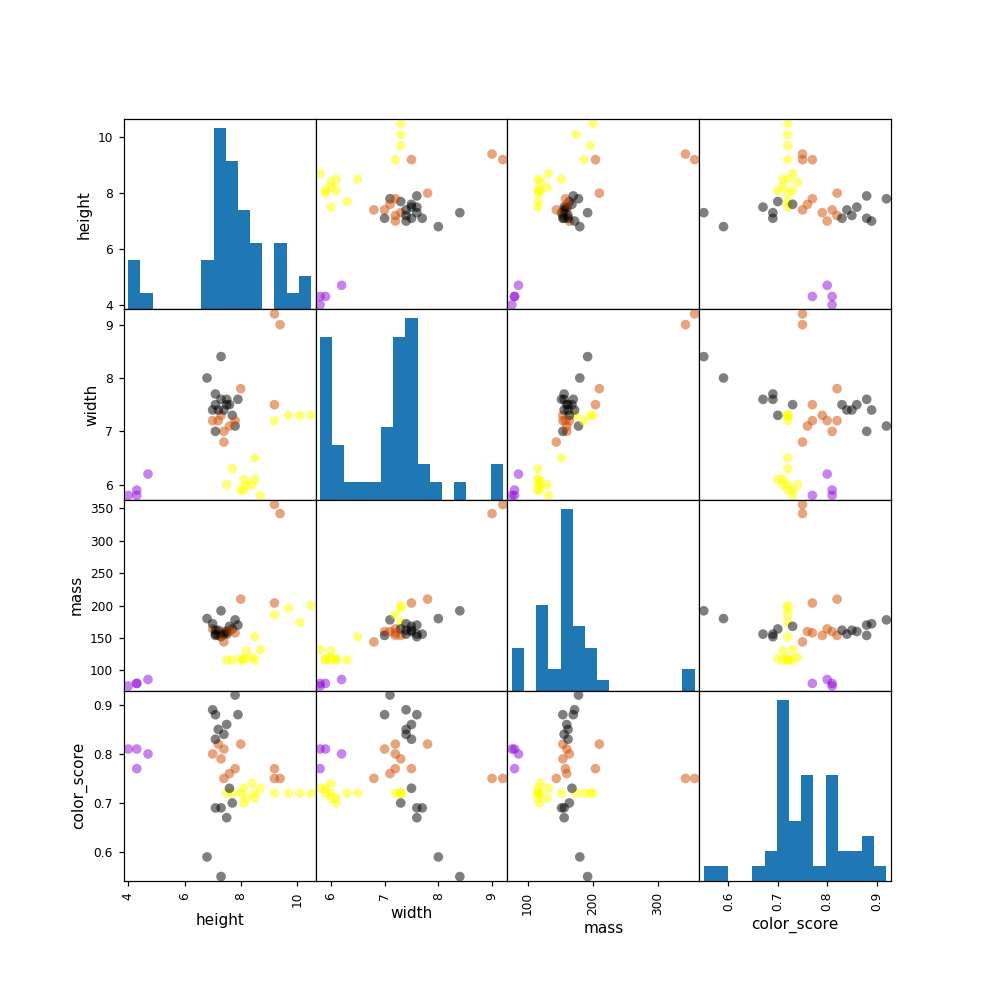

In [5]:
# plotting a scatter matrix
from matplotlib import cm #color map

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


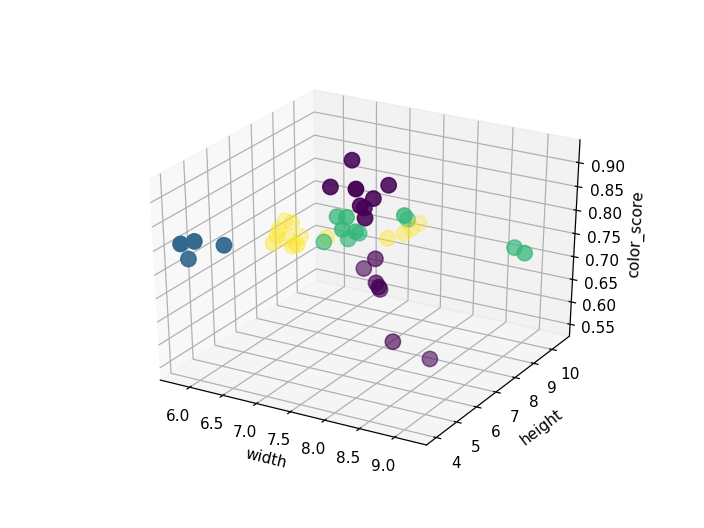

In [6]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### K-NN
**k-nn** (k nearest neighbors) can be used for classification or regression  
**k** in knn is no. of nearest neighbors the classifier will use in order to make prediction  
Algorithm -   
given a training set X_train with lables y_train and given a new instance x_test to be classified :  
1. find the most similar instances(x-nn) to x_test that are in x_train  
2. get labels y-nn for the instances in x-nn
3. predict the label for x_test by combining the labels y_nn  
e.g. simple majority vote

it needs 4 things -  
1. a distance metric (for ex. euclidean distance(minkowski with p=2))
2. how many 'nearest' neighbors to look at (ex. three)?
3. optional weighting function on neighbor points (ignored)
4. method for aggregating the classes of neighbor points (simple majority vote)

### Create train-test split

In [7]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [10]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [11]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [12]:
fruit_prediction

array([2])

In [13]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [14]:
# !pip install graphviz

<IPython.core.display.Javascript object>


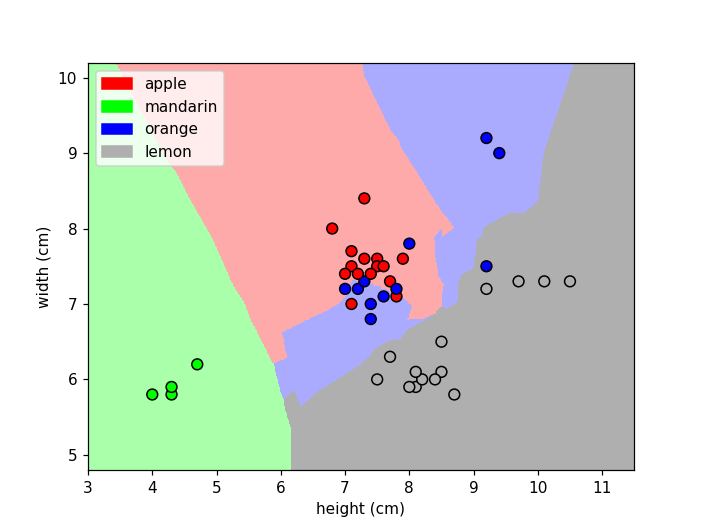

In [15]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

<IPython.core.display.Javascript object>


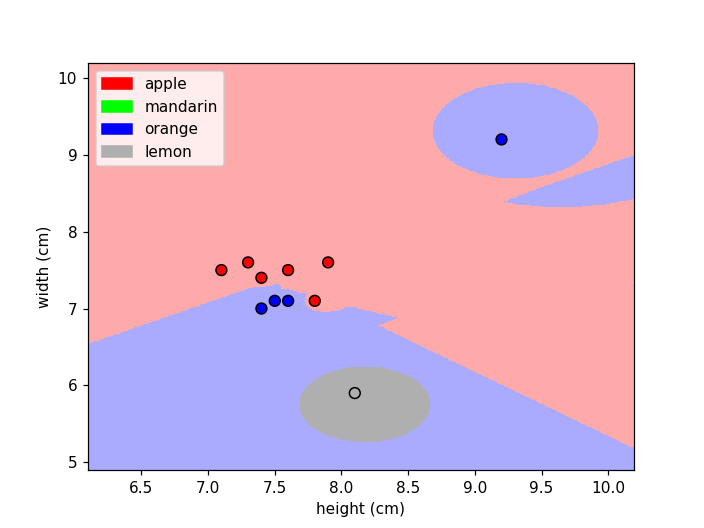

In [18]:
plot_fruit_knn(X_train, y_train, 5, 'distance')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


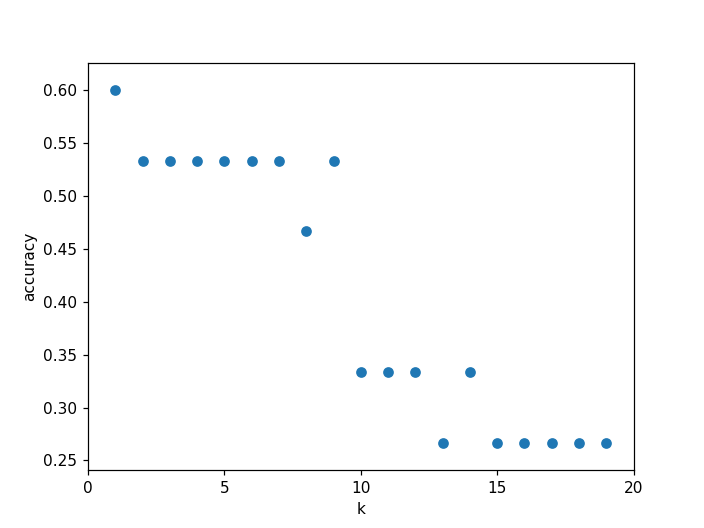

In [16]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


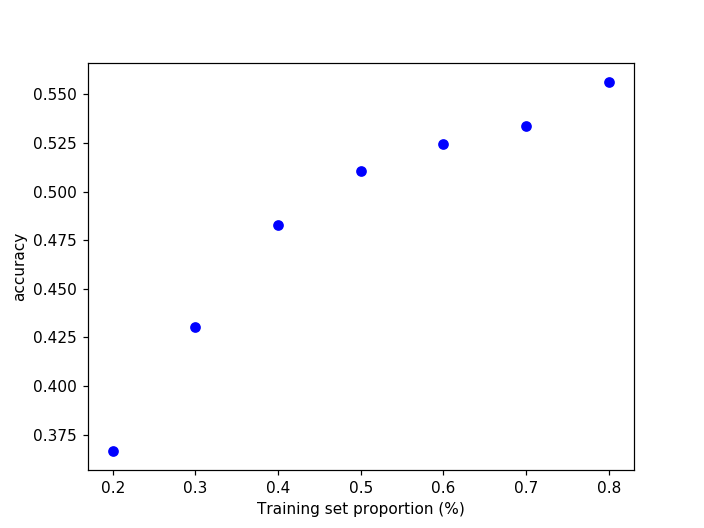

In [17]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');